In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

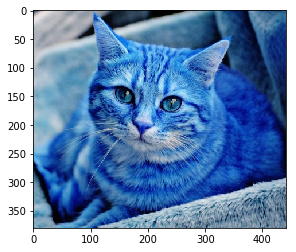

In [5]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
# cv2.imshow(title, image)
plt.imshow(image) 
# Í≥†ÏñëÏù¥Í∞Ä ÌååÎûÄÏù¥Ïú†Îäî Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏ÏóêÎäî RGBÍ∞Ä ÏïÑÎãå BGRÎ°ú Ïù¥Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏ R->B, B->R

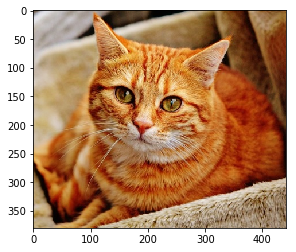

In [6]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB
plt.imshow(cat)

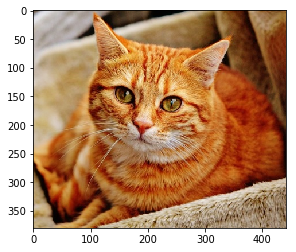

In [7]:
b, g, r = cv2.split(image) # img ÌååÏùºÏùÑ b,g,rÎ°ú Î∂ÑÎ¶¨
image = cv2.merge([r,g,b]) # b, rÏùÑ Î∞îÍøîÏÑú Merge
plt.imshow(image)

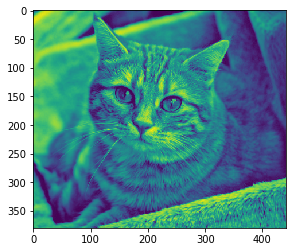

In [9]:
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)
# cmap = plt.get_cmap('gray') ÏóÜÏúºÎ©¥ ÏïºÍ¥ë? Í∞ôÏùÄ ÏÉâÏù¥ ÎÇòÏò¥

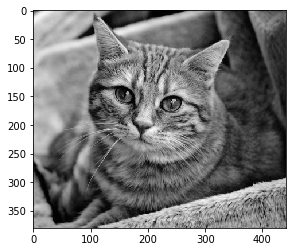

In [8]:
# Gray Scale image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap = plt.get_cmap('gray'))

## OpenCV Ïù¥ÎØ∏ÏßÄ Ïó∞ÏÇ∞

In [10]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


In [11]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0,100): # Ïù¥ÎØ∏ÏßÄÎäî arrayÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê®. Ï≤´ ÏãúÏûëÏù¥ (0,0)
    for k in range(0, 100):
        image[i, k] = [255,255,255] # ÌïòÏñÄÏÉâÏúºÎ°ú Î∞îÎÄú
print("-- %s seconds --" % (time.time()-start_time))

-- 0.01500082015991211 seconds --


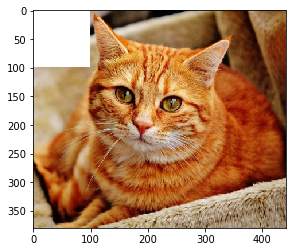

In [12]:
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage) # ÏúÑÏóê (0,0)Î∂ÄÌÑ∞ (100,100)ÍπåÏßÄ Ìù∞ÏÉâÏúºÎ°ú Î∞îÎÄú

In [13]:
start_time = time.time()
basicImage[0:100, 0:100] = [0,0,0] # Ïä¨ÎùºÏù¥Ïã±ÏùÑ Ïù¥Ïö©
print("-- %s second --" % (time.time()- start_time))

-- 0.0 second --


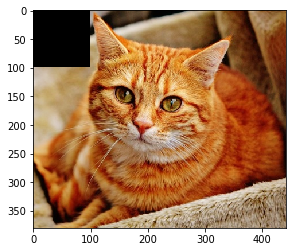

In [14]:
plt.imshow(basicImage) # (0,0)Î∂ÄÌÑ∞ (100,100)ÍπåÏßÄ Í≤ÄÏùÄÏÉâÏúºÎ°ú Î∞îÎÄú

## Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†à

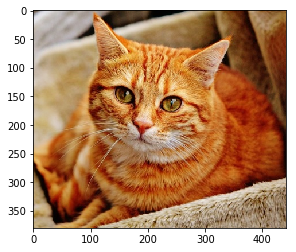

In [15]:
image = cv2.imread('images/cat.jpg')
expand = cv2.resize(image, None, fx=2.0, fy = 2.0, interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

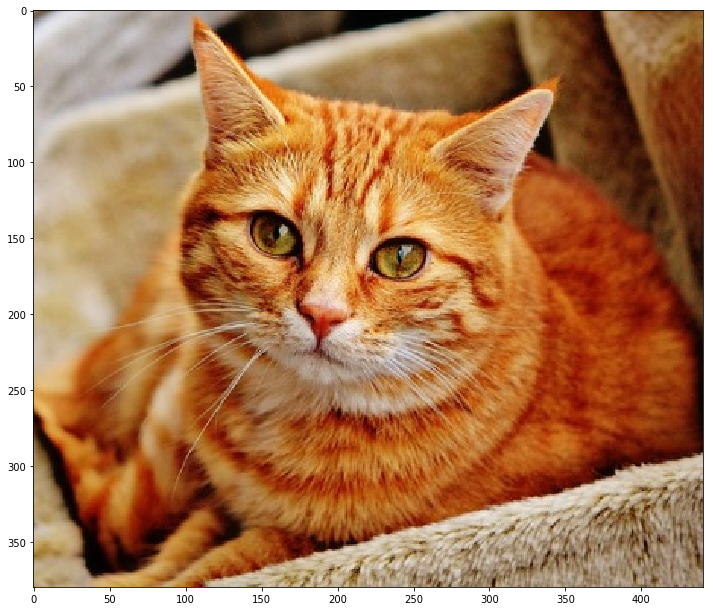

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(image)

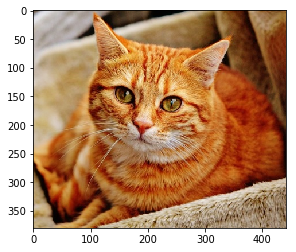

In [18]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(image)

### Ïù¥ÎØ∏ÏßÄ ÏúÑÏπò Î≥ÄÍ≤Ω
#### cv2.warpAffine(image, M, dsize)
* M: Î≥ÄÌôò ÌñâÎ†¨
* dsize: Manual Size
* Î≥ÄÌôò ÌñâÎ†¨
    * ùëÄ11 ùëÄ12 ùëÄ13
    * ùëÄ21 ùëÄ22 ùëÄ23
* Ïù¥ÎØ∏ÏßÄÏùò Î™®Îì† Ï¢åÌëú (a, b)Îäî Îã§ÏùåÏùò Ï¢åÌëúÎ°ú Ïù¥Îèô
    * (ùëÄ11 ‚àó ùëé + ùëÄ12 ‚àó ùëè + ùëÄ13, ùëÄ21 ‚àó ùëé + ùëÄ22 ‚àó ùëè + ùëÄ23)
* Îã®Ïàú Ïù¥ÎØ∏ÏßÄ ÏúÑÏπò Î≥ÄÍ≤Ω
    * 1 0 xÏúÑÏπò
    * 0 1 yÏúÑÏπò

In [26]:
image = cv2.imread('images/cat.jpg')

In [27]:
image.shape

(380, 441, 3)

In [28]:
height, width = image.shape[:2]

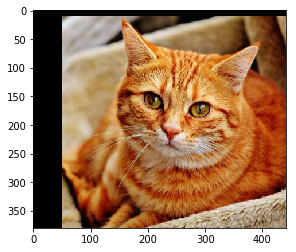

In [31]:
M = np.float32([[1,0,50], [0,1,10]])
dst = cv2.warpAffine(image, M, (width, height))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

### Ïù¥ÎØ∏ÏßÄ ÌöåÏ†Ñ
#### cv2.getRotationMatrix2D(center, angle, scale)
* center: ÌöåÏ†Ñ Ï§ëÏã¨
* angle: ÌöåÏ†Ñ Í∞ÅÎèÑ
* scale: Scale Factor

* ÌöåÏ†Ñ Î≥ÄÌôòÏùÑ ÏúÑÌïú Í∏∞Î≥∏Ï†ÅÏù∏ ÌñâÎ†¨
    * ùëêùëúùë†ùúÉ ‚àíùë†ùëñùëõùúÉ
    * ùë†ùëñùëõùúÉ ùëêùëúùë†ùúÉ

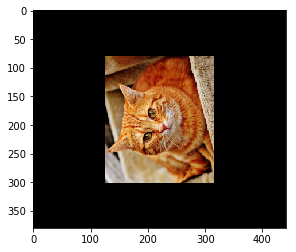

In [32]:
image = cv2.imread('images/cat.jpg')
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

## OpenCV Ïù¥ÎØ∏ÏßÄ Ìï©ÏπòÍ∏∞

In [33]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

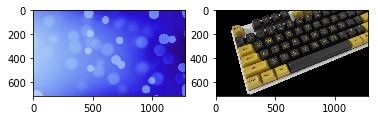

In [37]:
plt.subplot(121)
plt.imshow(image_1)

plt.subplot(122)
plt.imshow(image_2)

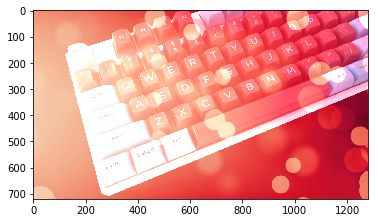

In [34]:
result = cv2.add(image_1, image_2)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

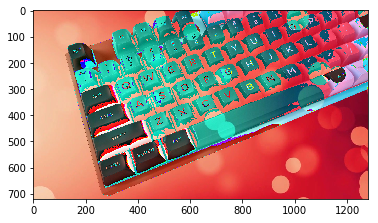

In [38]:
result = image_1 + image_2
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

## ÏûÑÍ≥ÑÏ†ê Ï≤òÎ¶¨ÌïòÍ∏∞

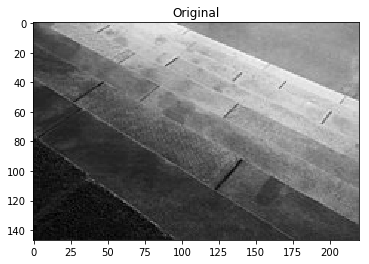

In [39]:
basic = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

In [40]:
grey1 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY)
grey2 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY_INV)
grey3 = cv2.threshold(basic, 127, 255, cv2.THRESH_TRUNC)
grey4 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO)
grey5 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO_INV)

In [46]:
grey1

(127.0, array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

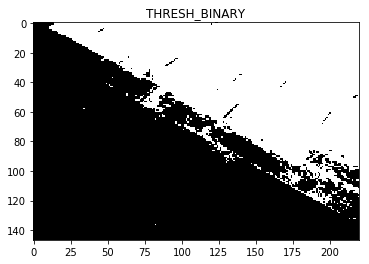

In [41]:
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

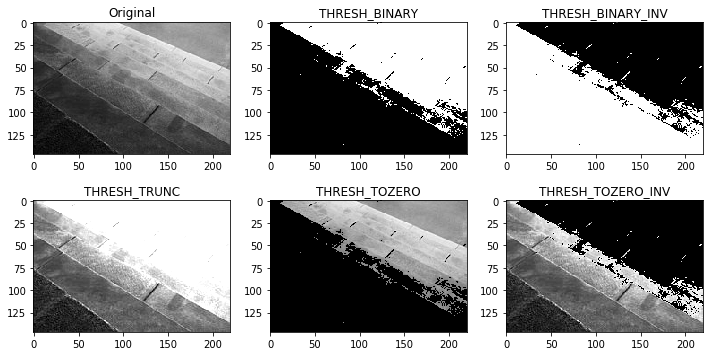

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

plt.subplot(232)
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

plt.subplot(233)
plt.title('THRESH_BINARY_INV')
plt.imshow(grey2[1], cmap=plt.get_cmap('gray'))

plt.subplot(234)
plt.title('THRESH_TRUNC')
plt.imshow(grey3[1], cmap=plt.get_cmap('gray'))

plt.subplot(235)
plt.title('THRESH_TOZERO')
plt.imshow(grey4[1], cmap=plt.get_cmap('gray'))

plt.subplot(236)
plt.title('THRESH_TOZERO_INV')
plt.imshow(grey5[1], cmap=plt.get_cmap('gray'))

In [44]:
image = cv2.imread('images/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)
thres1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

In [47]:
thres1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

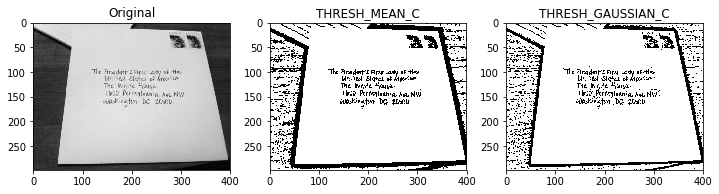

In [45]:
# ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÏóê Îã§ÏàòÏùò Ï°∞Î™Ö ÏÉÅÌÉúÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image, cmap=plt.get_cmap('gray'))

plt.subplot(132)
plt.title('THRESH_MEAN_C')
plt.imshow(thres1, cmap=plt.get_cmap('gray'))

plt.subplot(133)
plt.title('THRESH_GAUSSIAN_C')
plt.imshow(thres2, cmap=plt.get_cmap('gray'))